# Importing Dependencies/Liabraries

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


# Data Collection & Preprocessing

In [2]:
house_data=pd.read_csv("C:/Users/dell/OneDrive/Documents/ML Private Projects/Datasets/Mumbai1.csv")

In [3]:
house_data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
house_data.tail()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6346,6346,2750000,700,Badlapur East,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1


In [5]:
house_data.shape

(6347, 19)

In [6]:
house_data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [8]:
house_data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
house_data.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [10]:
house_data.drop(columns='Unnamed: 0',inplace=True)

In [11]:
house_data.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [12]:
house_data['Location'].nunique()

413

# Label Encoding On (Location) Column

In [13]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
house_data['Location']= label_encoder.fit_transform(house_data['Location'])

# Data Visualization

In [14]:
house_data['Location'].value_counts()

136    533
342    418
179    390
348    319
39     176
      ... 
412      1
247      1
321      1
195      1
206      1
Name: Location, Length: 413, dtype: int64

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

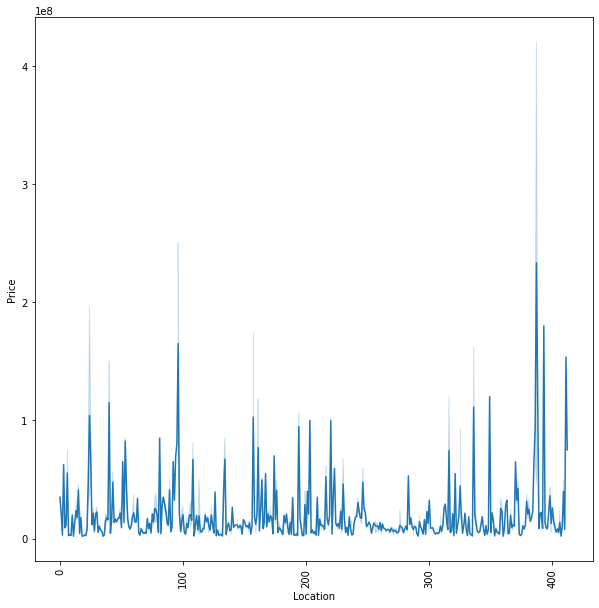

In [15]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Location',y='Price',data=house_data)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Area', ylabel='Price'>

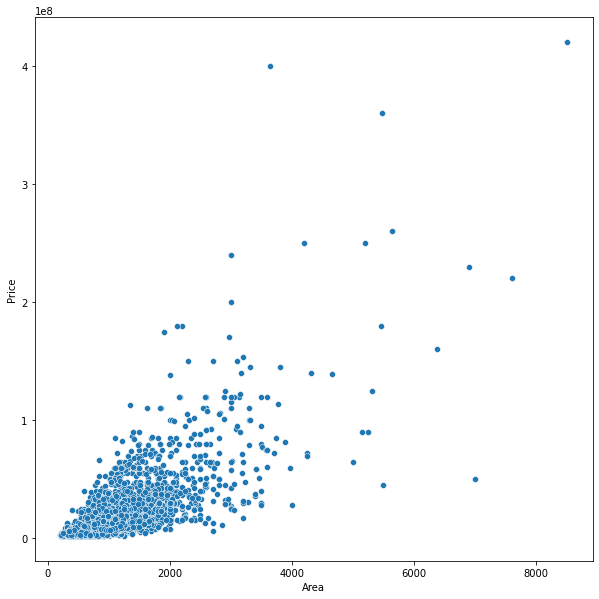

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Area',y='Price',data=house_data)

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='Price'>

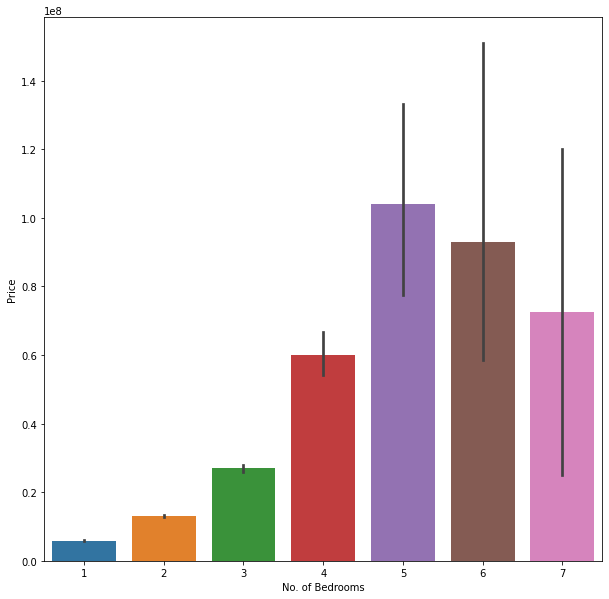

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x='No. of Bedrooms',y='Price',data=house_data)

<AxesSubplot:xlabel='New/Resale', ylabel='Price'>

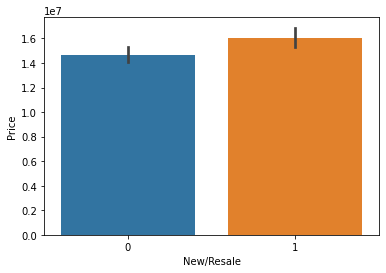

In [18]:
sns.barplot(x='New/Resale',y='Price',data=house_data)

<AxesSubplot:xlabel='Gymnasium', ylabel='Price'>

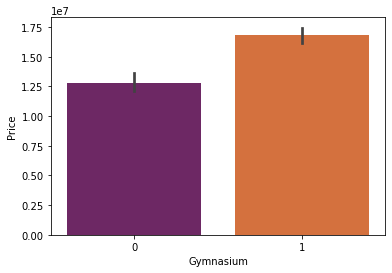

In [19]:
sns.barplot(x='Gymnasium',y='Price',data=house_data,palette='inferno')

<AxesSubplot:xlabel='Swimming Pool', ylabel='Price'>

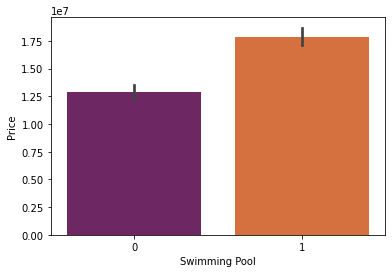

In [20]:
sns.barplot(x='Swimming Pool',y='Price',data=house_data,palette='inferno')

<AxesSubplot:>

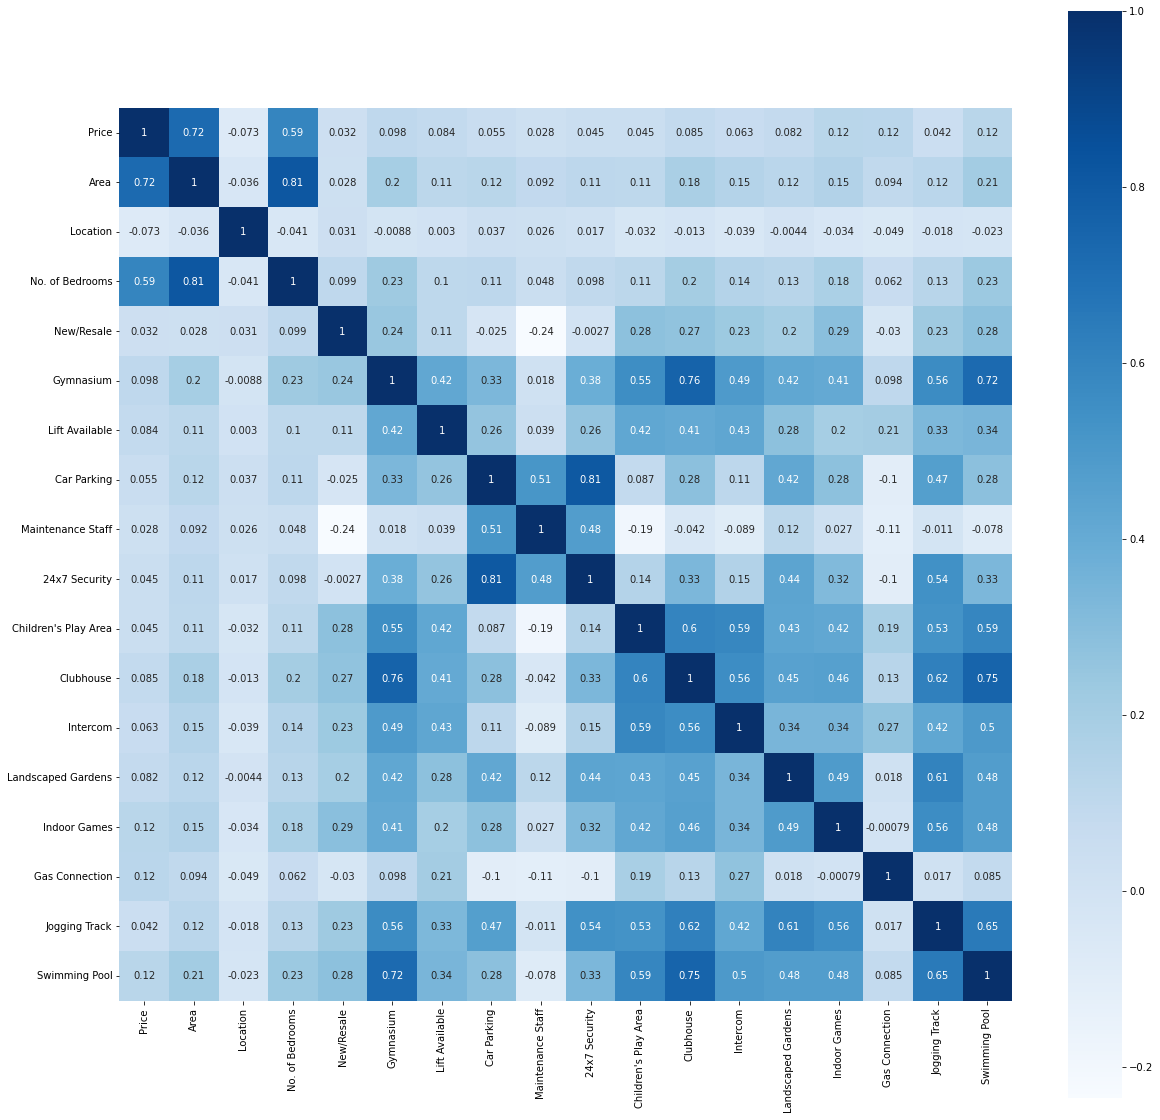

In [21]:
house_corr=house_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(house_corr,square=True,cbar=True,annot=True,cmap='Blues')

# Train_Test_Split

In [22]:
X=house_data.drop(columns='Price',axis=1)
Y=house_data['Price']

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [24]:
X

,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,720,136,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,600,136,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,650,136,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,650,136,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,665,136,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,700,320,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,900,342,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,900,342,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,1380,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
Y

0        4850000
1        4500000
2        6700000
3        4500000
4        5000000
          ...   
6342     2485000
6343    14500000
6344    14500000
6345     4100000
6346     2750000
Name: Price, Length: 6347, dtype: int64

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(6347, 17) (4442, 17) (1905, 17)


In [27]:
print(Y.shape,Y_train.shape,Y_test.shape)

(6347,) (4442,) (1905,)


# Model Building

Random Forest

In [28]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

#Training Data
X_train_prediction=RF.predict(X_train)
X_train_r2score=r2_score(X_train_prediction,Y_train)
X_train_MAE=mean_absolute_error(X_train_prediction,Y_train)
print('R2 Score :',X_train_r2score*100)
print('Mean Absolute Error :',X_train_MAE)


R2 Score : 95.06368675297257
Mean Absolute Error : 1478319.532736838


In [29]:
RF.score(X_train,Y_train)

0.9586604405061965

# Building a predictive system on the basis of Random Forest Regressor

In [30]:
Input_data=np.array([[665,136,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0]]) 
# Actual price was 5000000 for this input
Predictive_system=RF.predict(Input_data)
print(Predictive_system)

[4947000.]


Text(0.5, 1.0, 'Predictive price vs Actual Price')

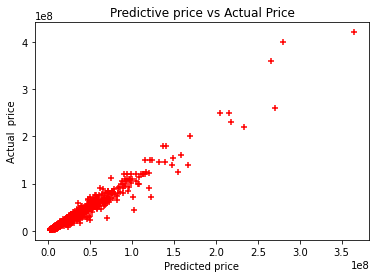

In [31]:
plt.scatter(X_train_prediction,Y_train,color='red',marker="+")
plt.xlabel("Predicted price")
plt.ylabel("Actual  price")
plt.title("Predictive price vs Actual Price")

# Deploying Model using joblib

In [32]:
import joblib
joblib.dump(RF,"Mumbai_House_Price_predictions.pkl")

['Mumbai_House_Price_predictions.pkl']

In [33]:
model=joblib.load("Mumbai_House_Price_predictions.pkl")